# <span style="color:black"> Esercitazioni - lezione 4 </span>

## <span style="color:black"> Esercizio 04.1 </span>

L'idea della simulazione presentata in questo jupiter è quella di partire da una configurazione di 128 atomi disposti su un reticolo cristallino (in modo da evitare scoomode sovrapposizioni che implicherebbero al primo passaggio una forza di repulsione tra particelle infinita) con condizioni periodiche al contorno, e simularne la dinamica attraverso il calcolo di un potenziale di tipo Lennard-Jones:
$$V_{LJ}(R)=4\epsilon\left[\left(\frac{\sigma}{R}\right)^{12}-\left(\frac{\sigma}{R}\right)^{6}\right]$$
dove per comodità si sono simulate tutte le quantità in unità ridotte. 

In particolare si è utilizzato l'algoritmo di Verlet, il quale, anche con lunghi step temporali, ha la proprietà di conservare in modo eccellente l'energia, in modo da poter simulare in ambiente microcanonico.
Lo svantaggio delle scelte presentate risiede nella necessità di un'equilibrazione del sistema: la configurazione iniziale, in particolare, è quella di minima energia potenziale, per cui per simulare la dinamica atomica è necessario "fornire" energia al sistema, in modo che il sistema simuli effettivamente in media la temperatura desiderata e non una minore.

Per risolvere questo problema è stata implementata nel codice la possibillità di "termalizzare" il sistema, in particolare si è proceduto come segue:
* Inserimento di una variabile di *restart* che permetta, da file di testo assunto come input dal codice, di decidere se la simulazione da eseguire sarà per equilibrare il sistema (tipicamento usando pochi step) o meno.
* Salvataggio di tutte le quantità necessarie per eseguire una nuova simulazione con gli stessi parametri con cui era finita quella precedente: in particolare sono state salvate
   * oltre alle configurazioni finali (al passo n), anche le configurazioni al passo n-1
   * numero di configurazioni progressivo
   * numero di blocchi progressivo (utile per poter mostrare l'andamento dell'equilibrazione)
* (Nel caso di *restart=true*) Lettura delle posizioni attuali e precedenti, calcolo del nuovo step con l'algoritmo di Verlet e delle relative velocità. A questo punto due strade sono possibili per il calcolo della temperatura:
    1. Utilizzo delle velocità per il calcolo della temperatura attuale, e riscalamento delle velocità per fattore di scala dato da $f_s=\sqrt\frac{T_{attesa}}{T_{attuale}}$. Il problema di questo metodo consiste nel fatto che simulando un ensamble microcanonico la temperatura è fortemente variabile nel tempo, di conseguenza il fattore di scala non permette un riscalamento delle velocità adeguato, cioè non si riesce a simulare in buon accordo la temperatura desiderata.
    2. Il metodo utilizzato è quindi consistito nella stima della temperatura attuale come rislutato dell'ultimo valore della media a blocchi della temperatura della simulazione precedente. Questo procedimento migliora notevolmente la convergenza dell'equilibrazione, in modo da poter simulare effettivamente la temperatura desidetata. Poi si procede analogamente al punto precedente per riscalare le velocità.
    N.B. Questa possibilità è stata introdotta dopo aver svolto l'esercizio successivo, in modo da aver implementato il metodo dei bolcchi e aver salvato in files di output i valori delle medie dei blocchi.
* Da ultimo con le nuove velocità si sono calcolati gli step precedenti così da poter ricominciare la simulazione con l'algoritmo di Verlet.

## <span style="color:black"> Esercizio 04.2 </span>

Per implementare il metodo dei blocchi si è aggiunto al file di input del codice un valore corrispondente al numero di blocchi da utilizzare. Questo ha permesso, insieme al numero di steps della simulazione, di poter eseguire l'equilibrazione del sistema per un numero minore di blocchi senza però diminuire il numero di steps per blocco.
A questo punto è stato implementato il metodo dei blocchi in maniera usuale, stampando su appositi files di output i valori medi e le incertezza statistihe delle quantità $E/N$, $U/N$, $K/N$ e $T$ (rispettivamente energia interna, energia potenziale e energia cinetica per particella e temperatura).

N.B. Per effettuare la simulazione sono stati sempre usati 100 step per ogni blocco.

## <span style="color:black"> Esercizio 04.3 </span>
Si è poi inserito il calcolo della pressione, ricordando che per il teorema del viriale, in unità ridotte, la pressione vale:
$$ P = \rho T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N \frac{48}{\left(|\vec{r}_i -\vec{r}_j|\right)^{12}} - 
\frac{24}{\left(|\vec{r}_i -\vec{r}_j|\right)^6} \right\rangle $$
Se ne è quindi calcolato il valore istantaneo e la media a blocchi, stampando poi il risultato, insieme all'incertezza statistica, sul un file di output analogamente alle altre grandezze calcolate.

## <span style="color:black"> Esercizio 04.4 </span>
Ora si è eseguita effettivamente la simulazione per i due materiali Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) e Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) nelle 3 fasi
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

Per presentare i risultati, in unità naturali, si è aggiunto un valore *material* al file di input che indicasse i diversi materiali: se *material* è diverso da 0, allora da un altro file di input, caratteristico del materiale, si leggono le carattersitiche dello stesso e al momento di calcolare i valori istantanei delle grandezze si esegue la conversione:

$E=\left(\epsilon/k_B\right)k_B E^* = \epsilon E^*\rightarrow$ vale per $E$, $U$, e $K$.  
$P=\left(\epsilon/\sigma^3\right)P^*$  
$T=\left(\epsilon/k_B\right)T^*$

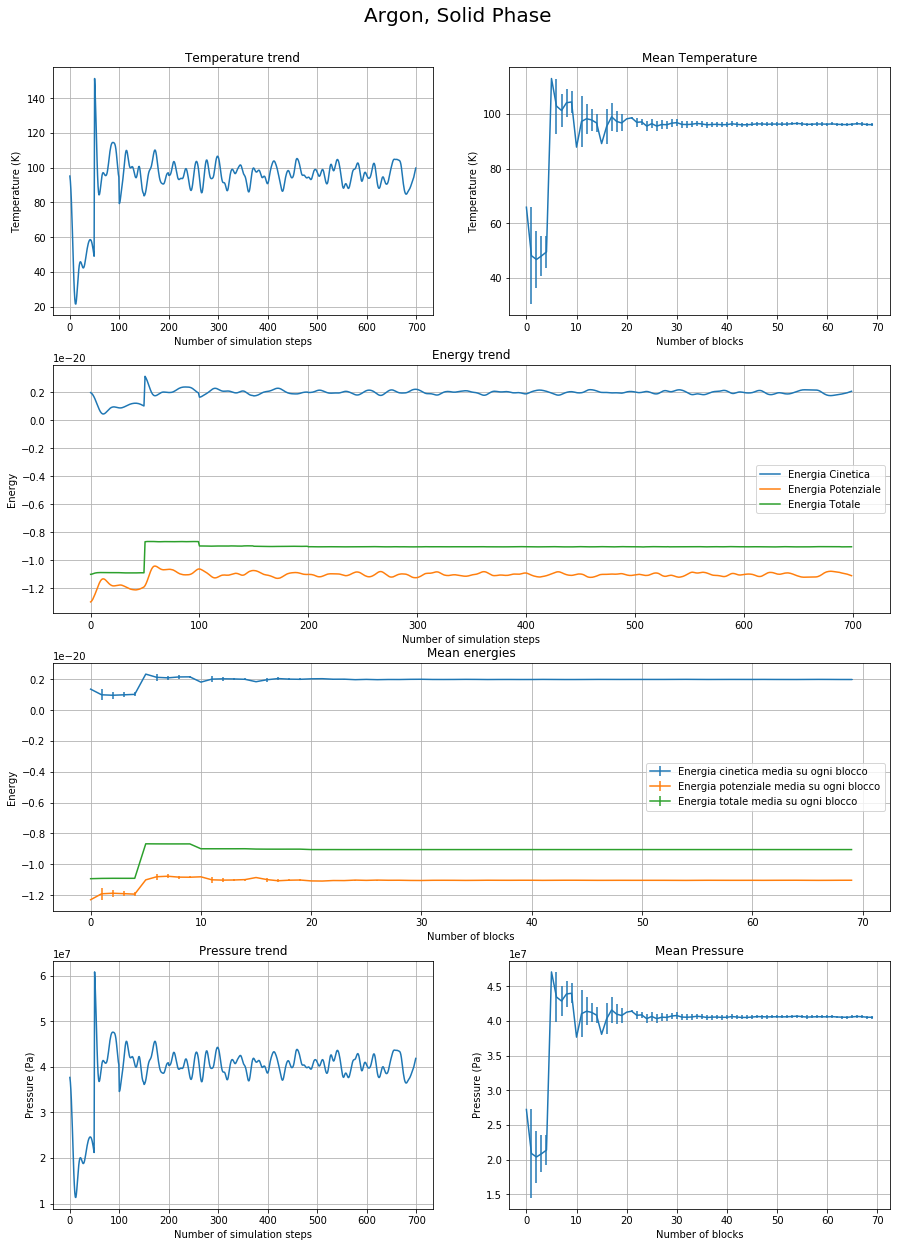

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15, 21))
fig.suptitle('Argon, Solid Phase', y='0.92', size='20', weight='20')
gs = gridspec.GridSpec(4, 2, figure=fig)

f4 = np.loadtxt('solid/output_temp_1.dat')
ax2 = fig.add_subplot(gs[0, 0])
ax2.plot(f4)
ax2.set_xlabel("Number of simulation steps")
ax2.set_ylabel("Temperature (K)")
ax2.grid()
plt.title("Temperature trend")

x1, f1, error1 = np.loadtxt('solid/output_ave_temp_1.dat', usecols=(0,1,2), unpack='true')
ax3= fig.add_subplot(gs[0, 1])
ax3.errorbar(x1, f1, yerr=error1, label='Temperatura media su ogni blocco')
ax3.set_xlabel("Number of blocks")
ax3.set_ylabel("Temperature (K)")
ax3.grid()
plt.title("Mean Temperature")

f1 = np.loadtxt('solid/output_ekin_1.dat')
f2 = np.loadtxt('solid/output_epot_1.dat')
f3 = np.loadtxt('solid/output_etot_1.dat')
ax = fig.add_subplot(gs[1, :])
ax.plot(f1, label='Energia Cinetica')
ax.plot(f2, label='Energia Potenziale')
ax.plot(f3, label='Energia Totale')
ax.set_xlabel("Number of simulation steps")
ax.set_ylabel("Energy")
ax.grid()
ax.legend(loc='right')
plt.title('Energy trend')

x1, f1, error1 = np.loadtxt('solid/output_ave_ekin_1.dat', usecols=(0,1,2), unpack='true')
x2, f2, error2 = np.loadtxt('solid/output_ave_epot_1.dat', usecols=(0,1,2), unpack='true')
x3, f3, error3 = np.loadtxt('solid/output_ave_etot_1.dat', usecols=(0,1,2), unpack='true')
ax6 = fig.add_subplot(gs[2, :])
ax6.errorbar(x1, f1, yerr=error1, label='Energia cinetica media su ogni blocco')
ax6.errorbar(x2, f2, yerr=error2, label='Energia potenziale media su ogni blocco')
ax6.errorbar(x3, f3, yerr=error3, label='Energia totale media su ogni blocco')
ax6.set_xlabel("Number of blocks")
ax6.set_ylabel("Energy")
ax6.grid()
ax6.legend(loc='right')
plt.title('Mean energies')

f4 = np.loadtxt('solid/output_pres_1.dat')
ax4= fig.add_subplot(gs[3, 0])
ax4.plot(f4)
ax4.set_xlabel("Number of simulation steps")
ax4.set_ylabel("Pressure (Pa)")
ax4.grid()
plt.title("Pressure trend")

x1, f1, error1 = np.loadtxt('solid/output_ave_pres_1.dat', usecols=(0,1,2), unpack='true')
ax5= fig.add_subplot(gs[3, 1])
ax5.errorbar(x1, f1, yerr=error1, label='Pressione media su ogni blocco')
#ax5.plot(x1, 0.8 +x1-x1)
ax5.set_xlabel("Number of blocks")
ax5.set_ylabel("Pressure (Pa)")
ax5.grid()
plt.title("Mean Pressure")

plt.show()

Nel grafico sopra sono stati riportati i risultati per la simulazione dello stato solido dell'Argon. Oltre alle quantità medie con le relative incertezze statistiche sono state anche riportati gli andamenti istantanei delle medesime quantità.  
Si notino i seguenti punti:
* Come spiegato per l'esercizio 04.1, si è modificato il codice in modo da poter osservare nei grafici anche il processo di equilibrazione.
* Per i valori istantanei di temperatura si verifica che essa non è stabile, e che quindi effettivamente risulta più conveniente per l'equilibrazione una stima della temperatura ottenuta con la media a blocchi dell'ultimo blocco della simulazione precedente.
* E' invece verificato che, sebbene energia cinetica e potenziale siano variabili, tuttavia l'energia totale, una volta equilibrato il sistema, rimane costante come previsto per l'ensamble microcanonico.

N.B. Si precisa che per tutte le simulazioni le grandezze fisiche di cui sono riportati i risultati sono state misurate ogni 10 step, e che ogni simulazione, una volta equilibrato il sistema, è composta da $10^4$ step.

<img src="images/graph1.liquid.png"> 

I grafici soprastanti rappresentano la fase liquida dell'Argon. Qui si inizia a vedere ciò che nel gas (grafici sottostanti) risulta molto evidente: ovvero che all'aumentare della temperatura caratteristica a cui il sistema viene simulato, la fase di equilibrazione assume un valore sempre meno "significativo", nel senso che gli atomi ad alte temperature sono più agevolati a rompere la struttura cristallina e ad uscire dalla buca di potenziale che essa rappresenta. Per questo motivo, osservando le scale della temperatura, si nota che nella fase gassosa i "salti" di questa grandezza dovuti all'equilibrazione sono dell'ordine di qualche Kelvin mentre nella fase solida sono dell'ordine delle diverse decine di Kelvin

<img src="images/graph1.gas.png"> 

Infine i grafici riportati di seguito mostrano i risultati ottenuti per la simulazione delle 3 fasi del Kripton

<img src="images/graph2.solid.png"> 

<img src="images/graph2.liquid.png"> 

<img src="images/graph2.gas.png"> 